# Exploratory Data Analysis: Data related job salaries
A portfolio project focused on Exploratory Data Analysis. An analysis of the salary data for Data Science jobs from 2020 to 2022

## Dataset Description:
The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

#### The dataset contains one table structured as follow:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year with the following possible values:
    * EN: Entry-level / Junior
    * MI: Mid-level / Intermediate
    * SE: Senior-level / Expert
    * EX: Executive-level / Director
* employment_type: The type of employement for the role:
    * PT: Part-time
    * FT: Full-time
    * CT: Contract
    * FL: Freelance
* job_title_name: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely, possible values are as follows:
    * 0: No remote work (less than 20%)
    * 50: Partially remote
    * 100: Fully remote (more than 80%)
* company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size: The average number of people that worked for the company during the year:
    * S: less than 50 employees (small)
    * M: 50 to 250 employees (medium)
    * L: more than 250 employees (large)


# Preliminary Wrangling

In [2]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
%matplotlib inline

In [3]:
#Load data from csv file
df_salaries = pd.read_csv('salaries.csv')

#display the shape of the data
print(df_salaries.shape)

#output random samples
df_salaries.sample(10)

(1332, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
792,2022,MI,FT,Data Engineer,60000,GBP,74313,GB,100,GB,M
1247,2021,MI,FT,Data Scientist,32000,EUR,37825,ES,100,ES,L
286,2022,SE,FT,Data Engineer,229998,USD,229998,US,0,US,L
1139,2021,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M
1097,2021,SE,FT,Data Science Manager,144000,USD,144000,US,100,US,L
902,2022,SE,FT,Data Analyst,116150,USD,116150,US,100,US,M
104,2022,SE,FT,Data Analyst,48000,EUR,50537,ES,0,ES,M
945,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
272,2022,SE,FT,Machine Learning Engineer,110000,USD,110000,CA,0,CA,M
926,2022,SE,FT,Data Analyst,80000,USD,80000,US,100,US,M


## What is the structure of the dataset?
The dataset contains salaries of 1332 employees for jobs related to data from 2020 to 2022. A total of 11 variables are used to record salaries. The majority of variables are qualitative with both ordered and unordered factor variables.

## What is/are the main feature(s) of interest in your dataset?
This data is primarily intended to help provide better guidance on what's being paid globally. The objective of this study is to determine the factors that contribute to higher salaries and salary trends over time.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
We believe that employee experience has the greatest influence on salary. Salary is also affected by job title_name, job type, year of employment, and company size, but to a lesser extent. Since we are not certain, we will test the correlation between salaries and the other variables (employee residence and company location).

# Data Assessment

In [4]:
df_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M
5,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
6,2022,SE,FT,Data Engineer,161000,USD,161000,US,100,US,M
7,2022,SE,FT,Data Engineer,110000,USD,110000,US,100,US,M
8,2022,SE,FT,Data Scientist,136000,USD,136000,US,100,US,M
9,2022,SE,FT,Data Scientist,104000,USD,104000,US,100,US,M


In [5]:
# A brief summary of the data
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


> In our table, there is no null value, and the columns' names do not contain spaces. Despite being able to work with the data types as they are, we will make some modifications: change experience level, company size, and remote ratio to ordered categories, and employment type to unordered categories.

#### Based on a visual examination of the data in a spreadsheet application, I noticed some job title_names had been recorded differently but  were the same

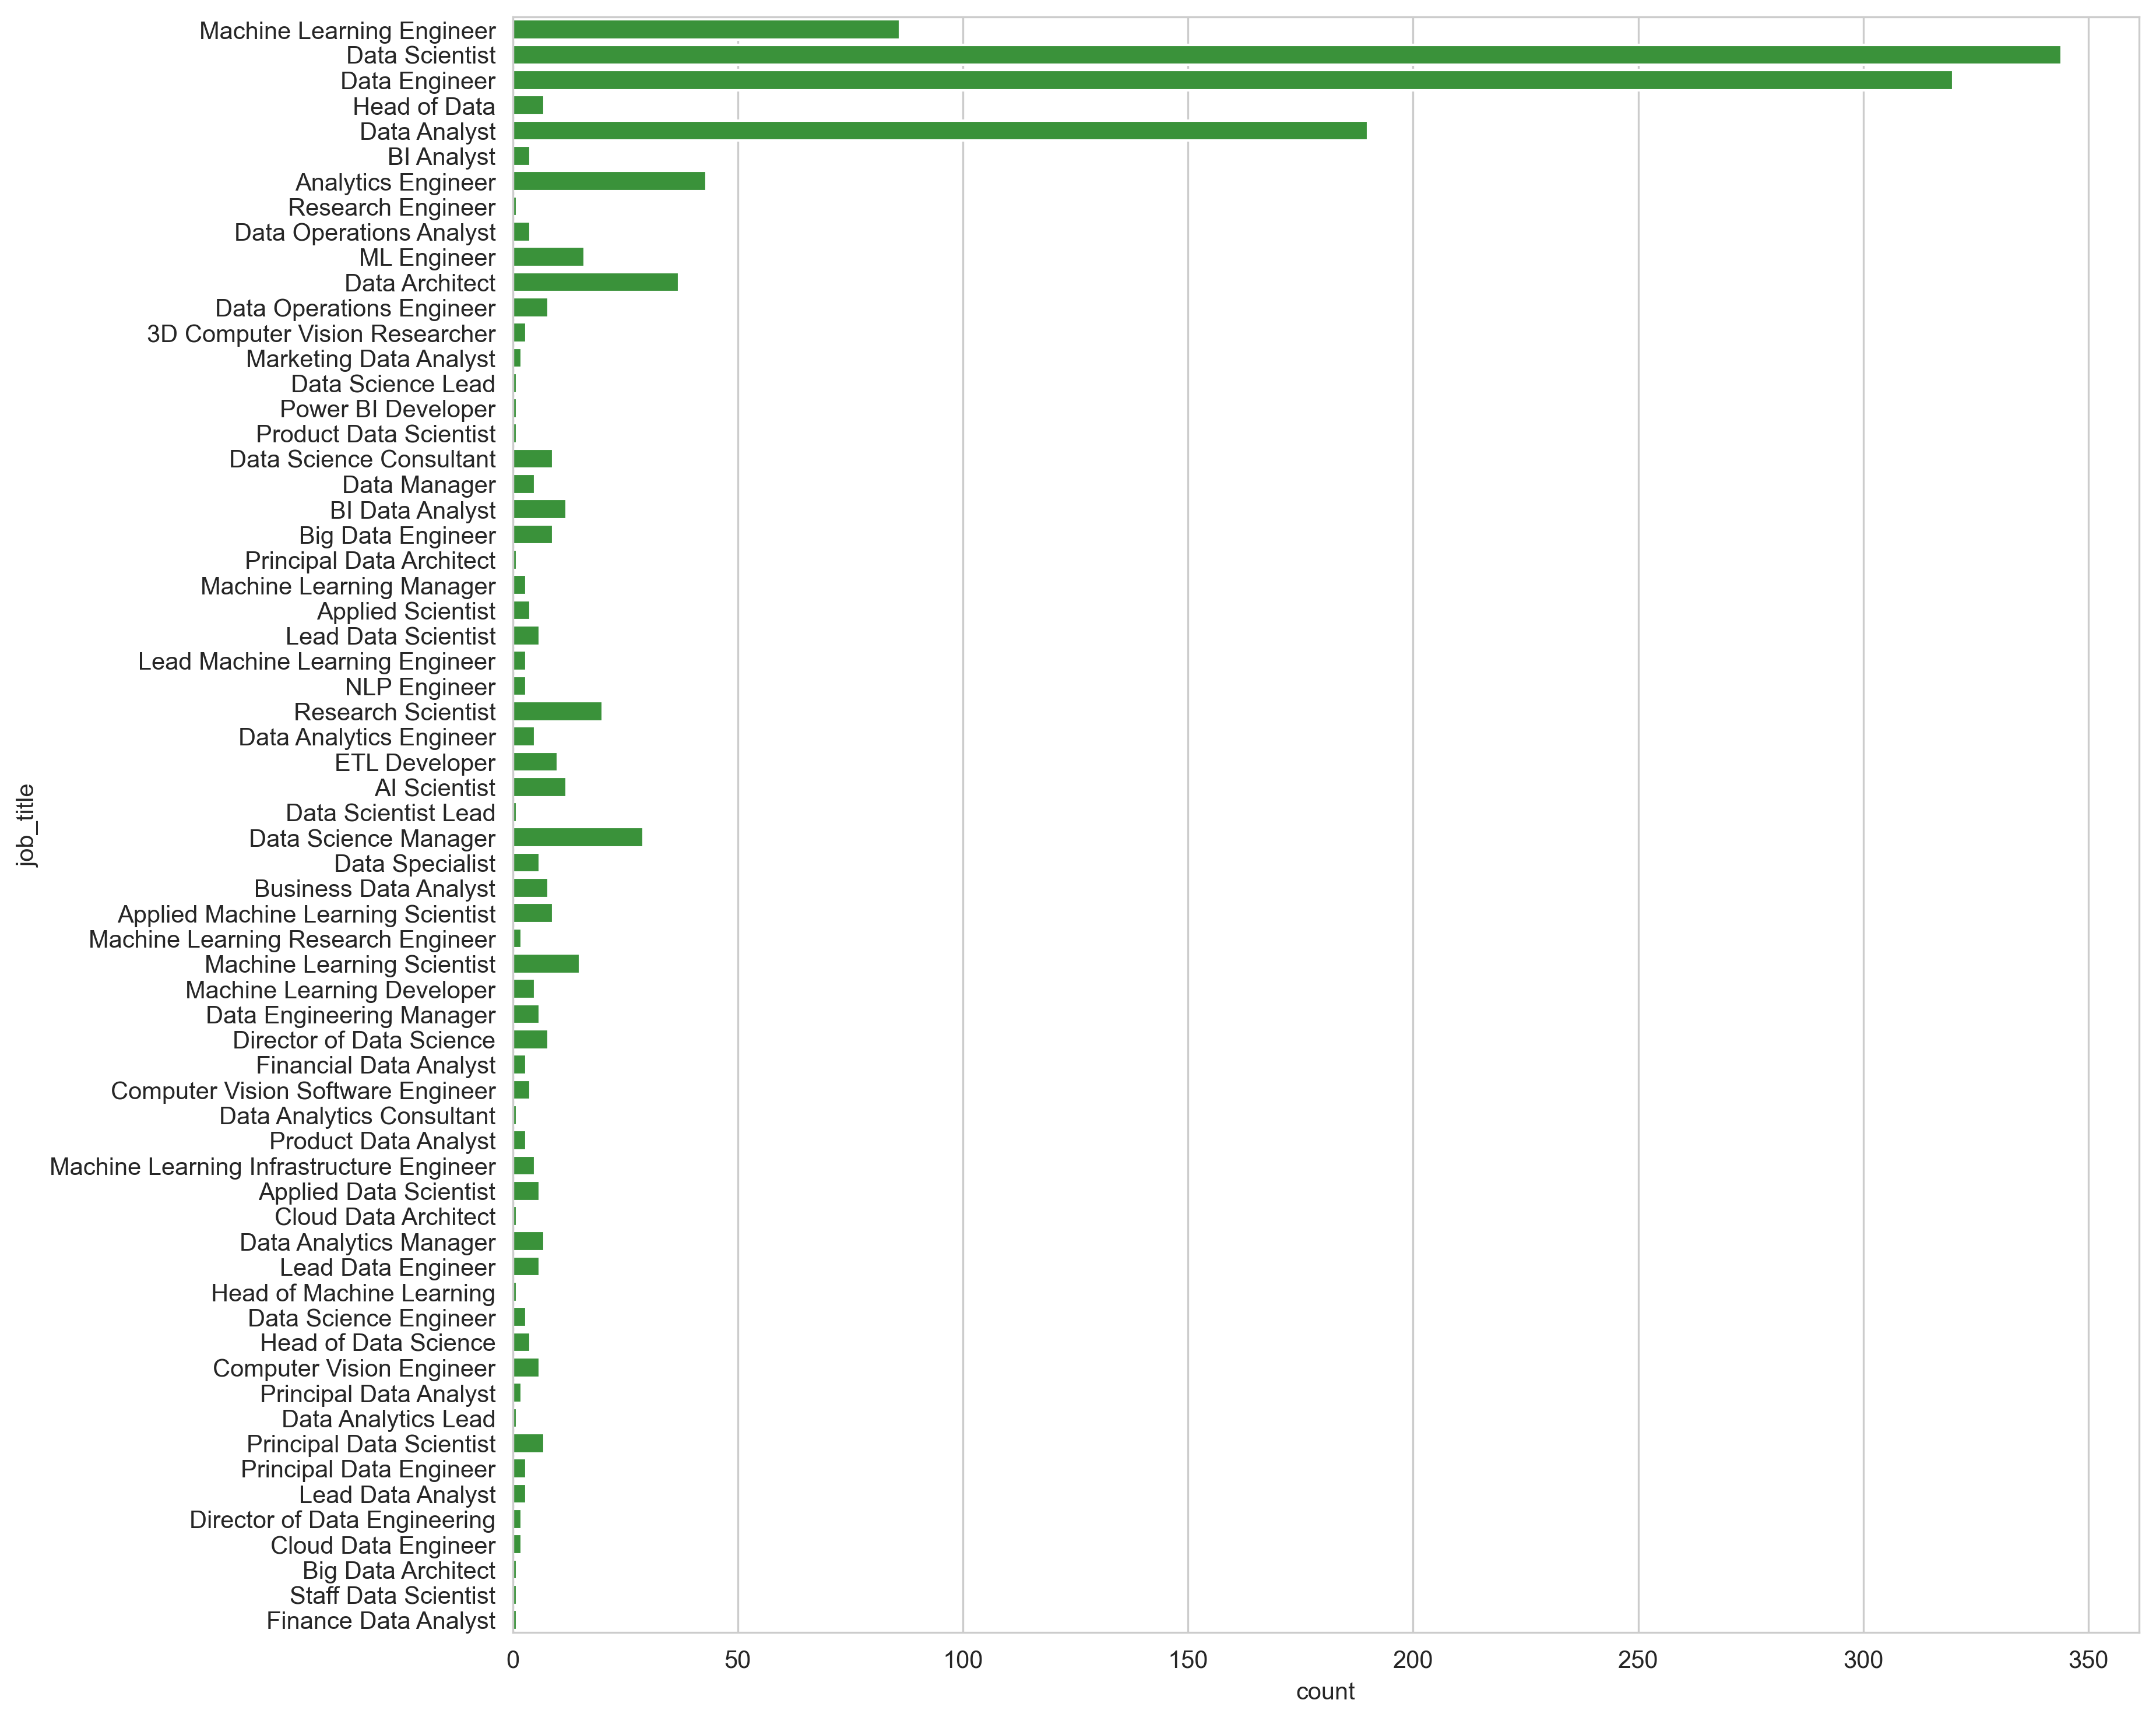

In [6]:
#Displaying the various job title_name entries 
sns.set_style('whitegrid')
plt.figure(figsize=[12,12], dpi=300)
default_color = sns.color_palette()[2]
sns.countplot(data=df_salaries,color=default_color, y='job_title')
plt.show()

>Majority of Machine Learning Engineers were recorded as 'Machine Learning Engineers',
However some entries were also recorded as 'ML Engineer' , 'Applied Machine Learning Scientist',
'Machine Learning Scientist', 'Machine Learning Developer', 'Machine Learning Infrastructure Engineer' etc
The same goes for data scientist, data analyst and data engineer entries

In [7]:
#displaying the Entries with 'ML Engineer'
df_salaries.loc[df_salaries['job_title'] == 'ML Engineer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2022,MI,FT,ML Engineer,180000,USD,180000,US,100,US,M
79,2022,MI,FT,ML Engineer,100000,USD,100000,US,100,US,M
203,2022,MI,FT,ML Engineer,148500,USD,148500,US,100,US,L
204,2022,MI,FT,ML Engineer,98200,USD,98200,US,100,US,L
312,2022,SE,FT,ML Engineer,195400,USD,195400,US,100,US,L
313,2022,SE,FT,ML Engineer,131300,USD,131300,US,100,US,L
341,2022,SE,FT,ML Engineer,130000,USD,130000,US,100,US,M
342,2022,SE,FT,ML Engineer,84000,USD,84000,US,100,US,M
720,2022,SE,FT,ML Engineer,240000,USD,240000,US,0,US,M
721,2022,SE,FT,ML Engineer,160000,USD,160000,US,0,US,M


In [8]:
#Displaying the entries that has the string 'Machine Learning' present
df_salaries.loc[df_salaries['job_title'].str.contains('Machine Learning')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
706,2022,SE,FT,Machine Learning Engineer,202900,USD,202900,US,100,US,L
763,2022,EN,FT,Machine Learning Engineer,28500,GBP,35298,GB,100,GB,L
272,2022,SE,FT,Machine Learning Engineer,110000,USD,110000,CA,0,CA,M
499,2022,MI,FT,Applied Machine Learning Scientist,75000,USD,75000,BO,100,US,M
988,2022,MI,FT,Machine Learning Developer,100000,CAD,77382,CA,100,CA,M
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1013,2022,MI,FT,Machine Learning Engineer,121000,AUD,84491,AU,100,AU,L
1027,2022,EN,CT,Applied Machine Learning Scientist,29000,EUR,30533,TN,100,CZ,M
84,2022,SE,FT,Machine Learning Engineer,210000,USD,210000,US,100,US,M
762,2022,EX,FT,Head of Machine Learning,6000000,INR,76967,IN,50,IN,L


In [9]:
df_salaries.loc[df_salaries['job_title'].str.contains('Data Analyst')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
709,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
677,2022,SE,FT,Data Analyst,109280,USD,109280,US,100,US,M
349,2022,SE,FT,Data Analyst,48000,EUR,50537,ES,0,ES,M
118,2022,SE,FT,Data Analyst,150000,USD,150000,US,0,US,M
49,2022,SE,FT,Data Analyst,119000,USD,119000,US,0,US,M
206,2022,SE,FT,Data Analyst,95000,USD,95000,US,100,US,M
745,2022,SE,FT,Data Analyst,164000,USD,164000,US,0,US,M
1184,2021,SE,FT,Data Analyst,200000,USD,200000,US,100,US,L
1217,2021,SE,FT,Data Analyst,90000,CAD,71786,CA,100,CA,M
454,2022,MI,FT,Financial Data Analyst,75000,USD,75000,US,0,US,M


In [10]:
df_salaries.loc[df_salaries['job_title'].str.contains('Data Engineer')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
237,2022,SE,FT,Data Engineer,300000,USD,300000,US,0,US,M
25,2022,SE,FT,Data Engineer,150000,USD,150000,US,0,US,M
146,2021,MI,FT,Data Engineer,100000,AUD,75050,AU,50,AU,L
121,2022,MI,FT,Data Engineer,42000,USD,42000,BR,100,BR,M
649,2022,SE,FT,Data Engineer,250000,USD,250000,US,0,US,M
598,2022,SE,FT,Data Engineer,102100,USD,102100,US,0,US,M
611,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
256,2022,SE,FT,Data Engineer,180000,USD,180000,US,100,US,M
923,2022,SE,FT,Data Engineer,110500,USD,110500,US,100,US,M
1103,2021,MI,FT,Data Engineer,90000,USD,90000,US,100,US,L


> This would be corrected by categorizing entries similar to this as one

In [11]:
# Display statistical summary for numerical variables
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [12]:
# Check Number of duplicated entries
df_salaries.duplicated().sum()

263

In [13]:
# Display entries for each year for the dataset and duplicates

# get the duplicate data
duplicates = df_salaries[df_salaries.duplicated()]

# print the year entries for the whole dataset
print(df_salaries.work_year.value_counts())

# print the year entries for duplicates
print(duplicates.work_year.value_counts())

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64
2022    260
2021      2
2020      1
Name: work_year, dtype: int64


> As far as our table's variables are concerned, it is logically possible for two or more people to have the same entries. As a result, we cannot determine if they are duplicates or distinct entries. The majority of duplicates are found in 2022, and 2022 has the most entries. The duplicates can be dropped.

## Data Issues

* Drop duplicated Entries
* The experience level, work_year, company size, and remote ratio should be changed to ordered category type, while the employment type should be changed to unordered category type.
* Categorize 'Machine learning', 'Data Scientist', 'Data Analyst' and 'Data Engineer' related job_title_name as one 
* Drop salary column as only salary_in_usd column would be used in our analysis for uniformity

## Cleaning Data

#### The experience level, work_year, company size, and remote ratio should be changed to ordered category type, while the employment type should be changed to unordered category type.

In [14]:
# Start by creating a copy of the dataset
df_salaries_clean = df_salaries.copy()

In [15]:
# Delete duplicates and reset index
df_salaries_clean.drop_duplicates(inplace= True, ignore_index=True)

In [16]:
# Re-Check
df_salaries_clean.duplicated().sum()

0

In [17]:
# Function to convert datatype to categorical (ordinal and nominal)
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    """ Converts type to category
            parameters:
            var: string, the name of the column to convert type
            ordered: boolean, If false, then the categorical is treated as unordered
            df: dataframe, 
            categories: the ordered list of the category
            
            return: the converted series 
    
    """
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        classes = CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(classes)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]

In [18]:
# Create category type
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022]

df_salaries_clean['experience_level'] = to_category('experience_level', True, df_salaries_clean, experience)
df_salaries_clean['company_size'] = to_category('company_size', True, df_salaries_clean, company)
df_salaries_clean['remote_ratio'] = to_category('remote_ratio', True, df_salaries_clean, remote)
df_salaries_clean['work_year'] = to_category('work_year', True, df_salaries_clean, year)
df_salaries_clean['employment_type'] = to_category('employment_type', False, df_salaries_clean, employment_type)

# Test types were converted. Dtype should be category
df_salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1069 non-null   category
 1   experience_level    1069 non-null   category
 2   employment_type     1069 non-null   category
 3   job_title           1069 non-null   object  
 4   salary              1069 non-null   int64   
 5   salary_currency     1069 non-null   object  
 6   salary_in_usd       1069 non-null   int64   
 7   employee_residence  1069 non-null   object  
 8   remote_ratio        1069 non-null   category
 9   company_location    1069 non-null   object  
 10  company_size        1069 non-null   category
dtypes: category(5), int64(2), object(4)
memory usage: 56.2+ KB


#### Categorize 'Machine learning', 'Data Scientist', 'Data Analyst' and 'Data Engineer' related job_title_name as one

In [19]:
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Scientist'), 'Data Scientist', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Engineer'), 'Data Engineer', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Bi Data Analyst'), 'Bi Analyst', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Data Analyst'), 'Data Analyst', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('Machine Learning'), 'Machine Learning Engineer', df_salaries_clean['job_title'])
df_salaries_clean['job_title'] = np.where(df_salaries_clean['job_title'].str.contains('ML Engineer'), 'Machine Learning Engineer', df_salaries_clean['job_title'])

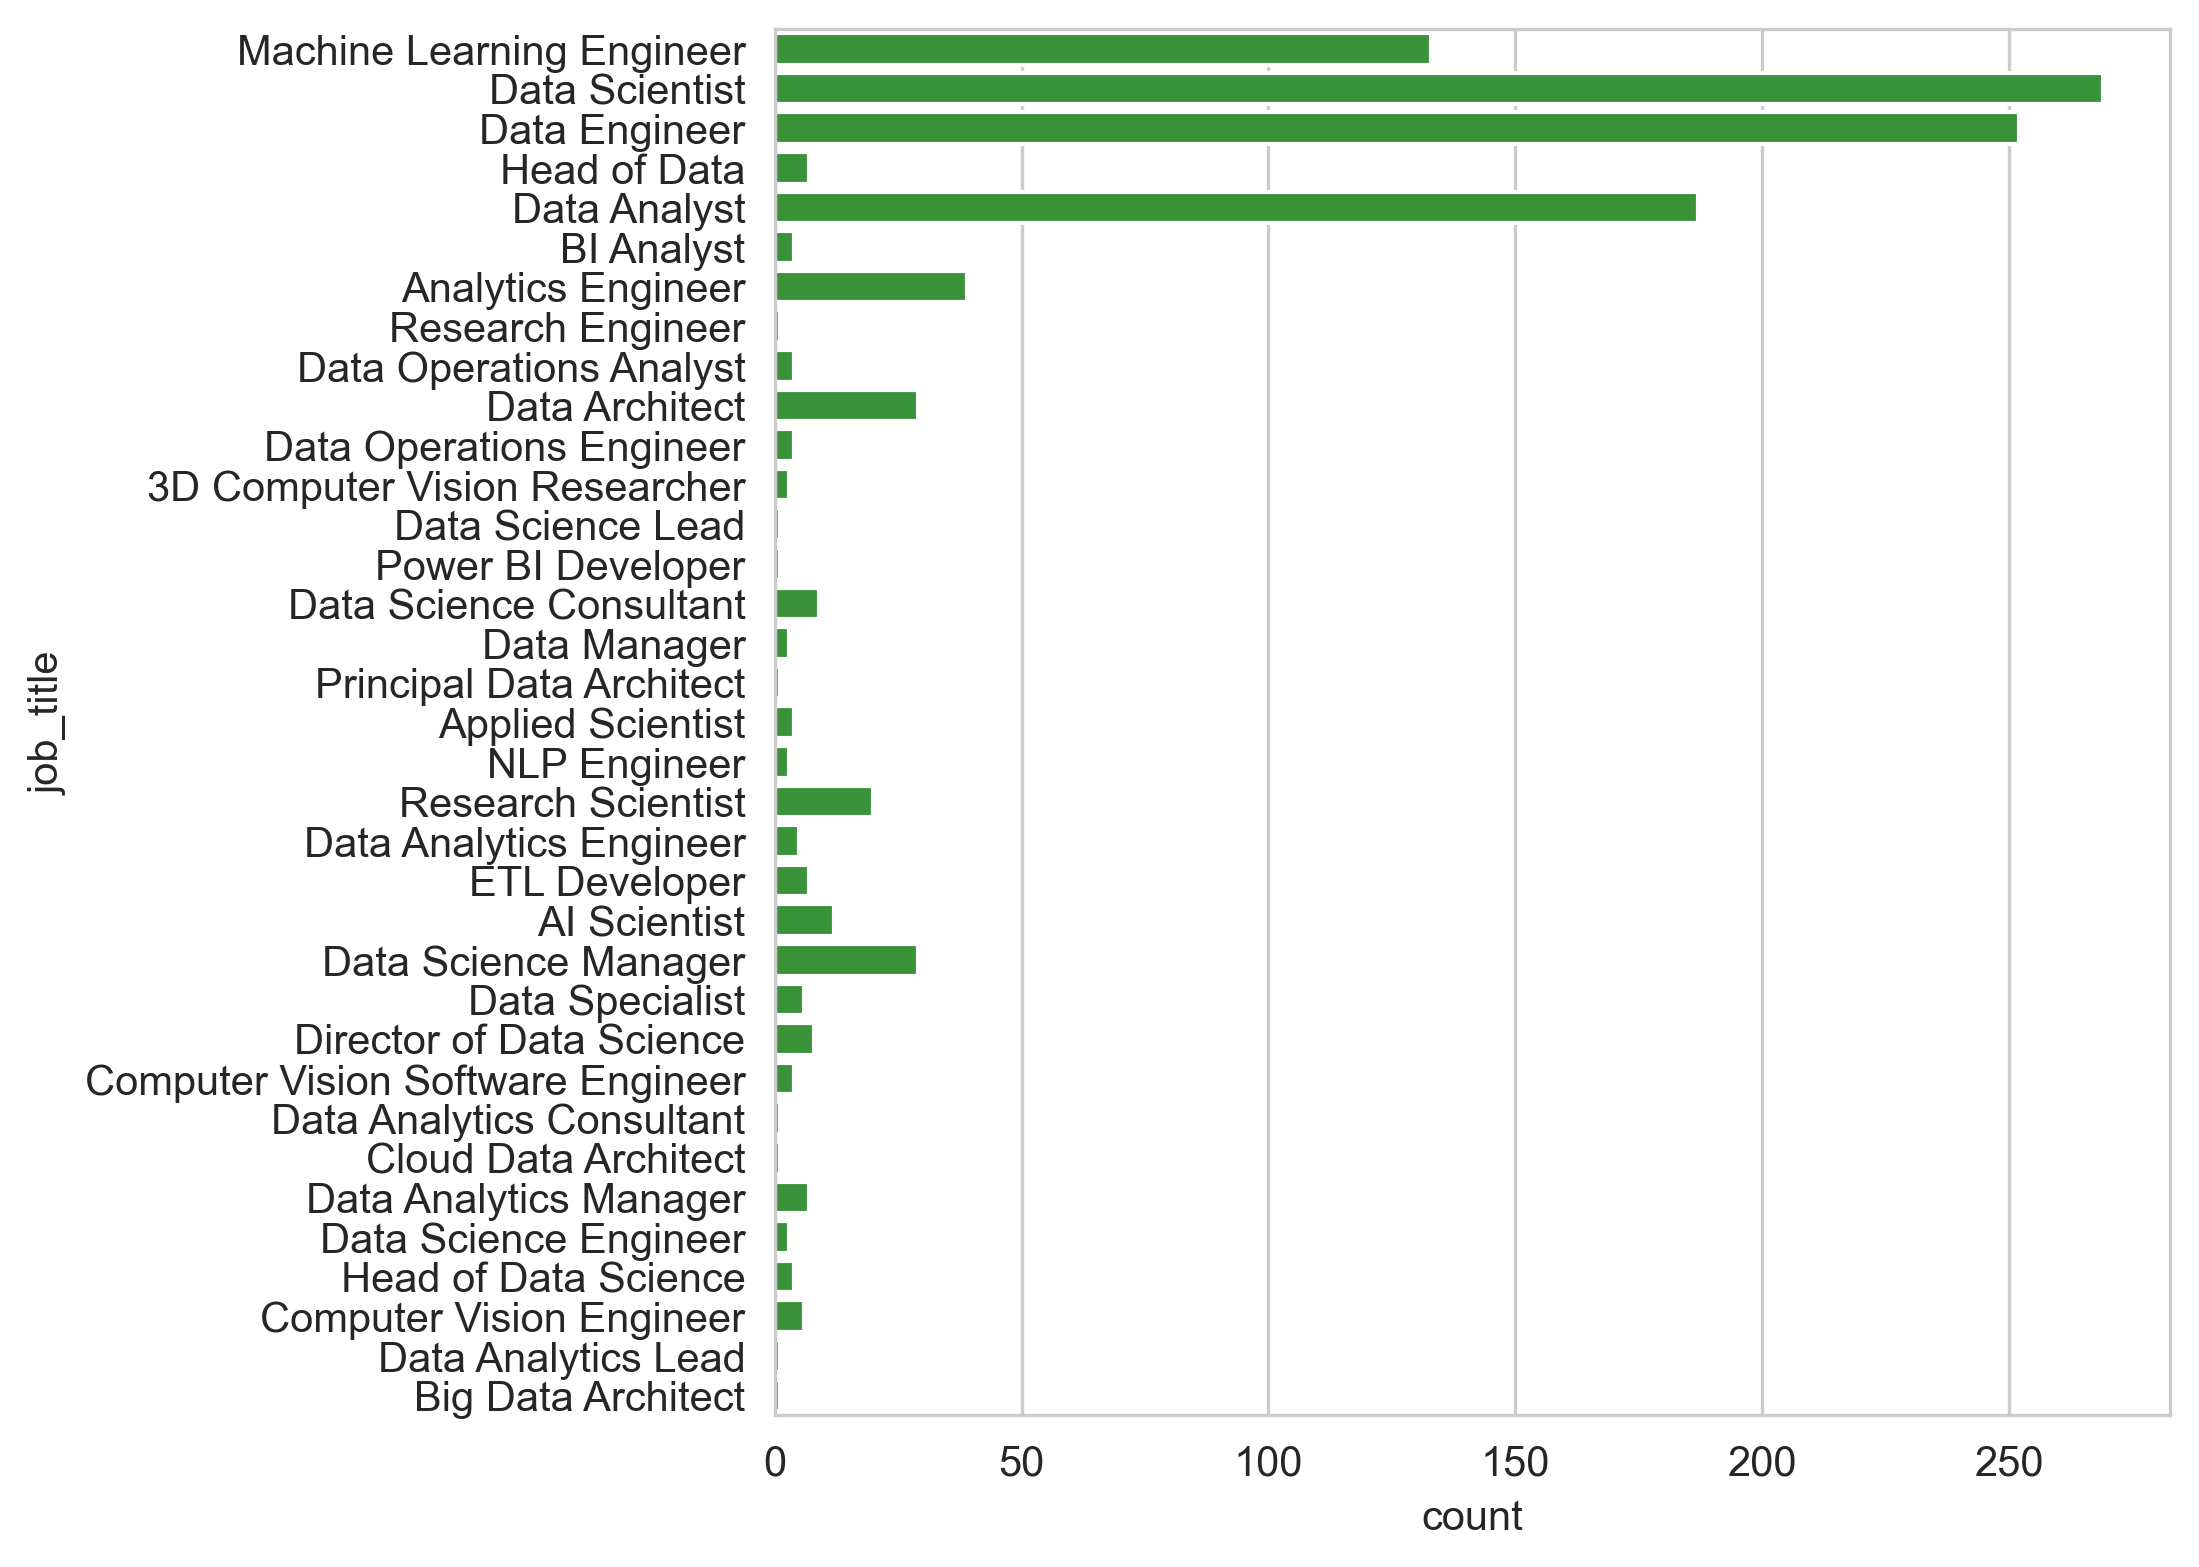

In [20]:
#Displaying the various job title_name entries 
sns.set_style('whitegrid')
plt.figure(figsize=[6,6], dpi=300)
default_color = sns.color_palette()[2]
sns.countplot(color=default_color, y=df_salaries_clean['job_title'])
plt.show()

#### Drop salary column as only salary_in_usd column would be used in our analysis for uniformity

In [21]:
# Use drop function to drop unwanted salary column
df_salaries_clean.drop(columns=['salary', 'salary_currency'],axis=1, inplace=True)

In [22]:
# Confirm if it has been dropped
list(df_salaries_clean.columns)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [23]:
df_salaries_clean.shape

(1069, 9)

In [24]:
# Save the cleaned data in a csv file
df_salaries_clean.to_csv('salaries_master.csv', index=False)

> The assessment and cleaning are complete. Our next step will be to plot our visualizations

In [25]:
# Load new csv file
salaries_clean = pd.read_csv('salaries_master.csv')

# Display sample Rows
salaries_clean.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
598,2022,MI,FT,Data Engineer,82900,US,0,US,M
193,2022,SE,FT,Data Engineer,160395,US,100,US,M
611,2022,MI,FT,Data Scientist,37156,GB,0,GB,M
873,2021,SE,FT,Data Analyst,88654,GR,100,DK,L
620,2022,SE,FT,Data Scientist,180000,US,0,US,L


# Univariate Exploration

### Question: What is the distribution of employee's experience, type of employment , company size and work year?

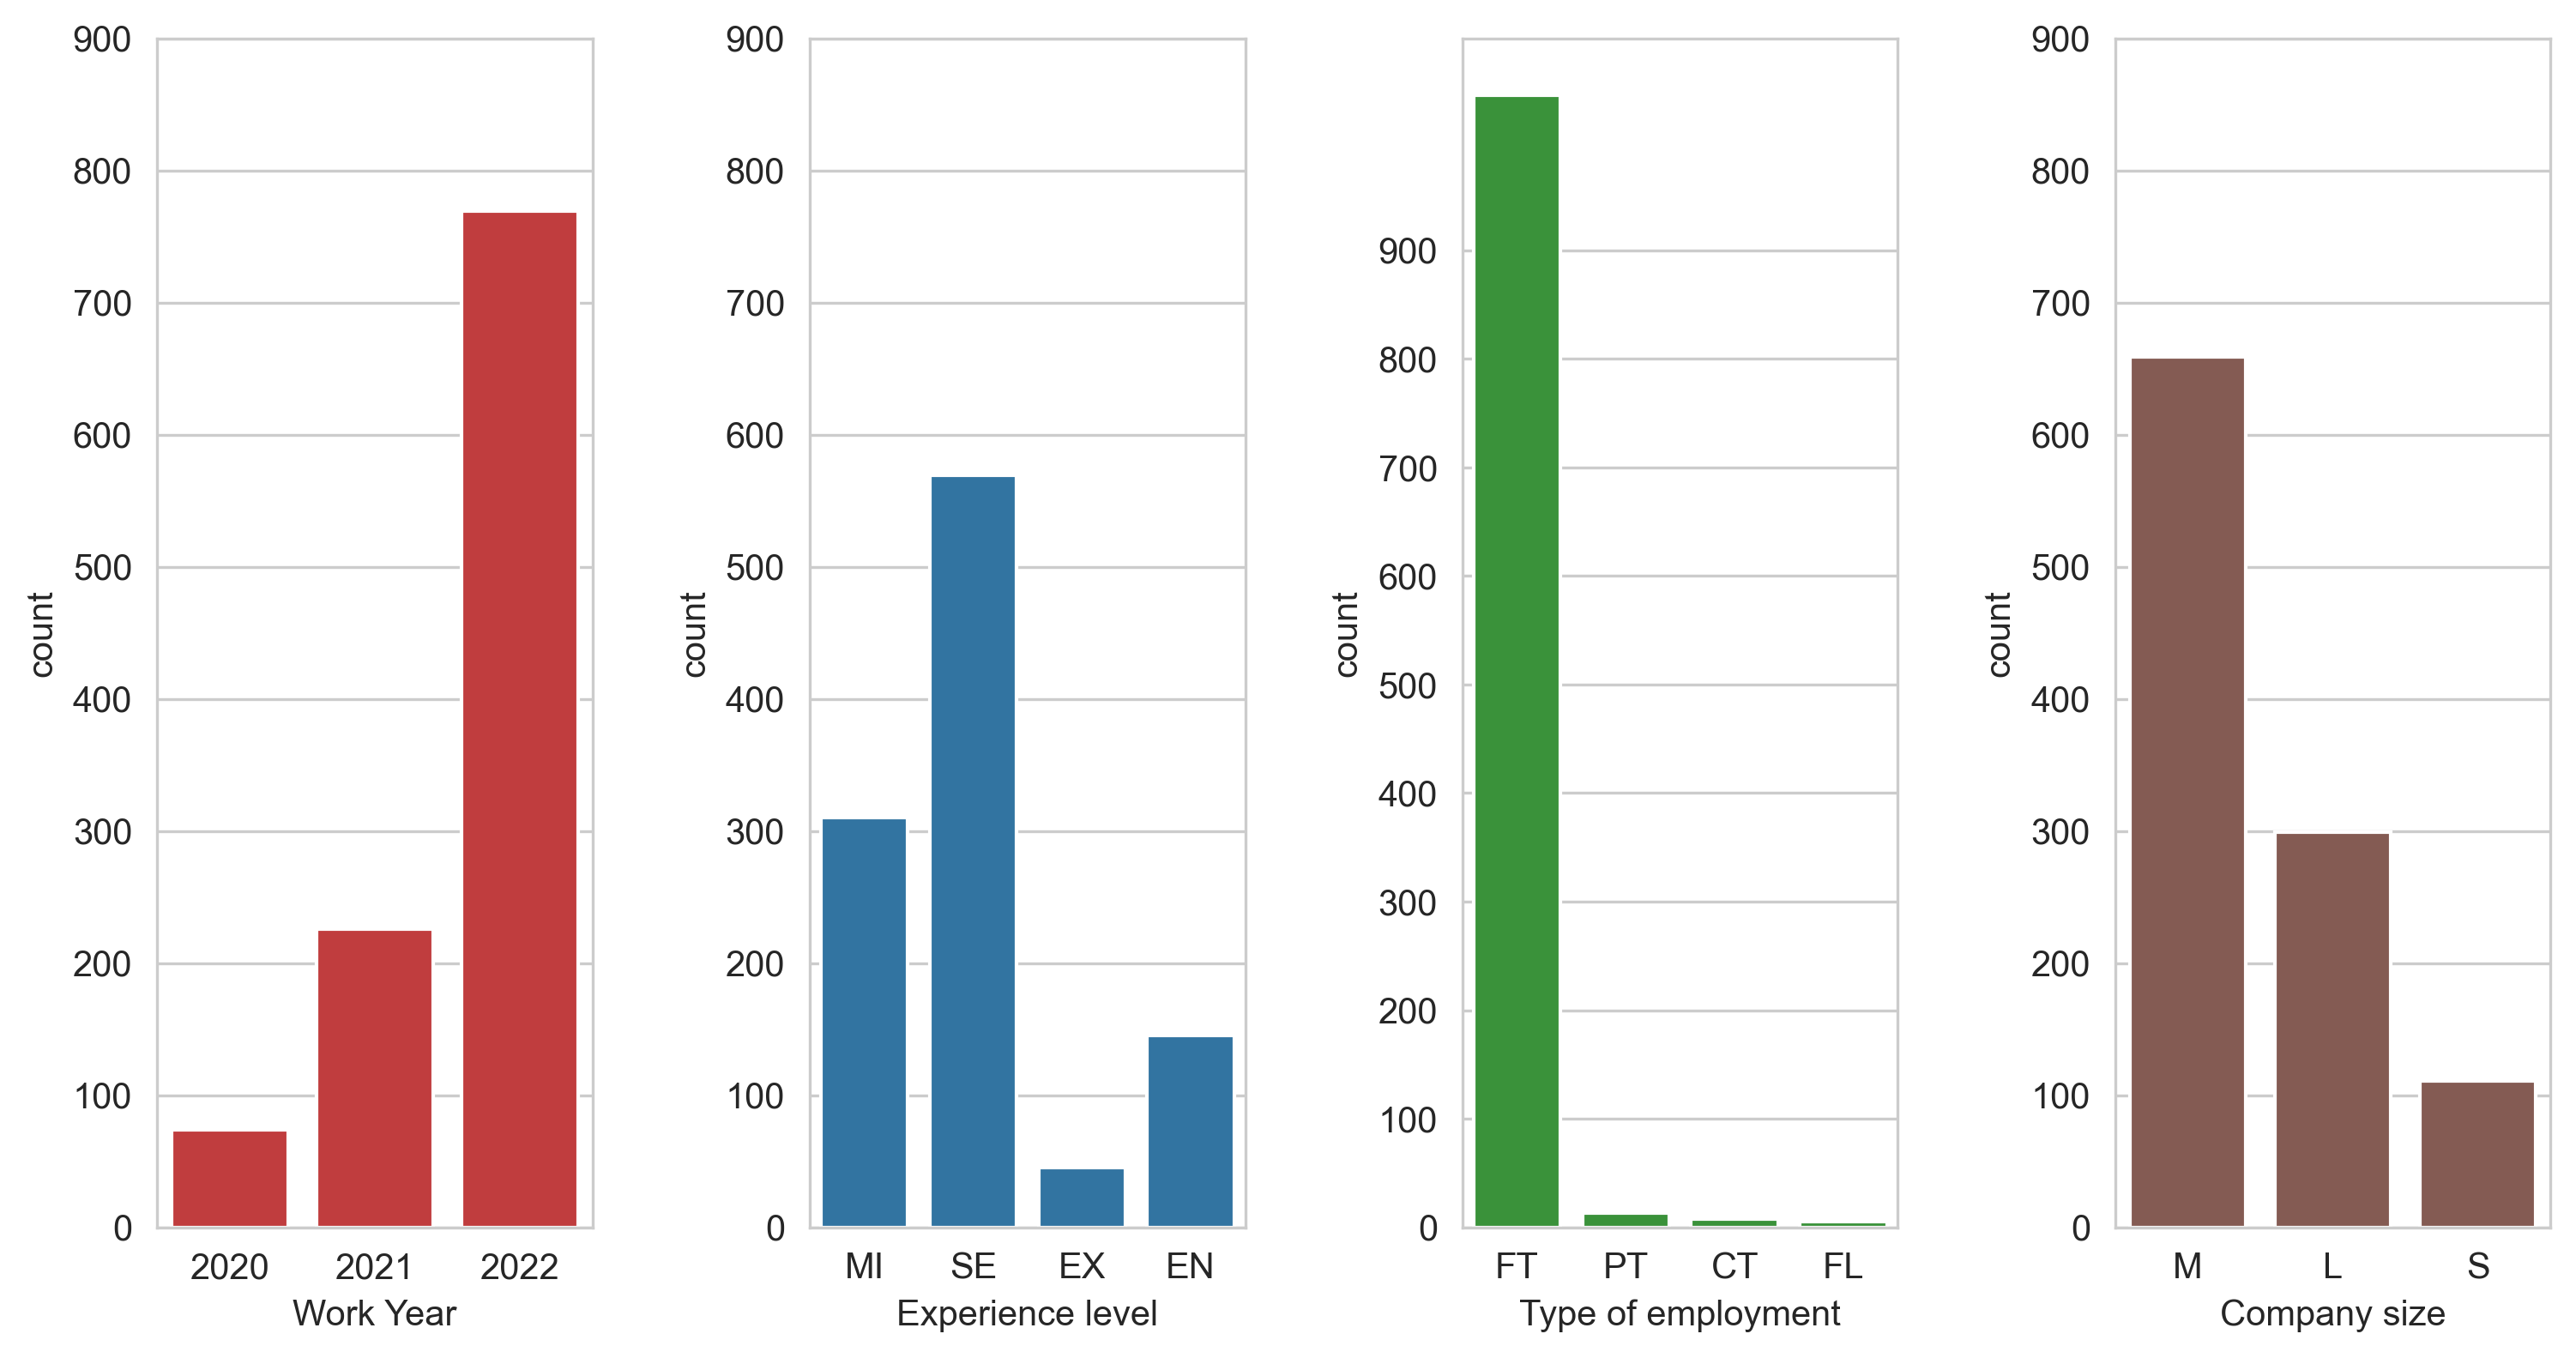

In [26]:
fig, ax = plt.subplots(1, 4 , figsize= [12,6], dpi=300)
yticks =  [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
sns.countplot(x= salaries_clean['work_year'], color = sns.color_palette()[3], ax = ax[0]).set(xlabel='Work Year', ylabel='count')
ax[0].set_yticks(yticks);
sns.countplot(x = salaries_clean['experience_level'], color = sns.color_palette()[0], ax = ax[1]).set(xlabel='Experience level', ylabel='count')
ax[1].set_yticks(yticks);
sns.countplot(x = salaries_clean['employment_type'], color = sns.color_palette()[2], ax = ax[2]).set(xlabel='Type of employment', ylabel='count')
ax[2].set_yticks(yticks);
sns.countplot(x = salaries_clean['company_size'], color = sns.color_palette()[5], ax = ax[3]).set(xlabel='Company size', ylabel='count')
ax[3].set_yticks(yticks);
plt.subplots_adjust(wspace=0.5)

> Observation: Most of the employees in the dataset have senior-level/expert experience levels. The majority of employees work full time. The majority of employees work for medium-sized companies. Most salaries were paid in 2022.

###  Question: What is the distribution of salaries?

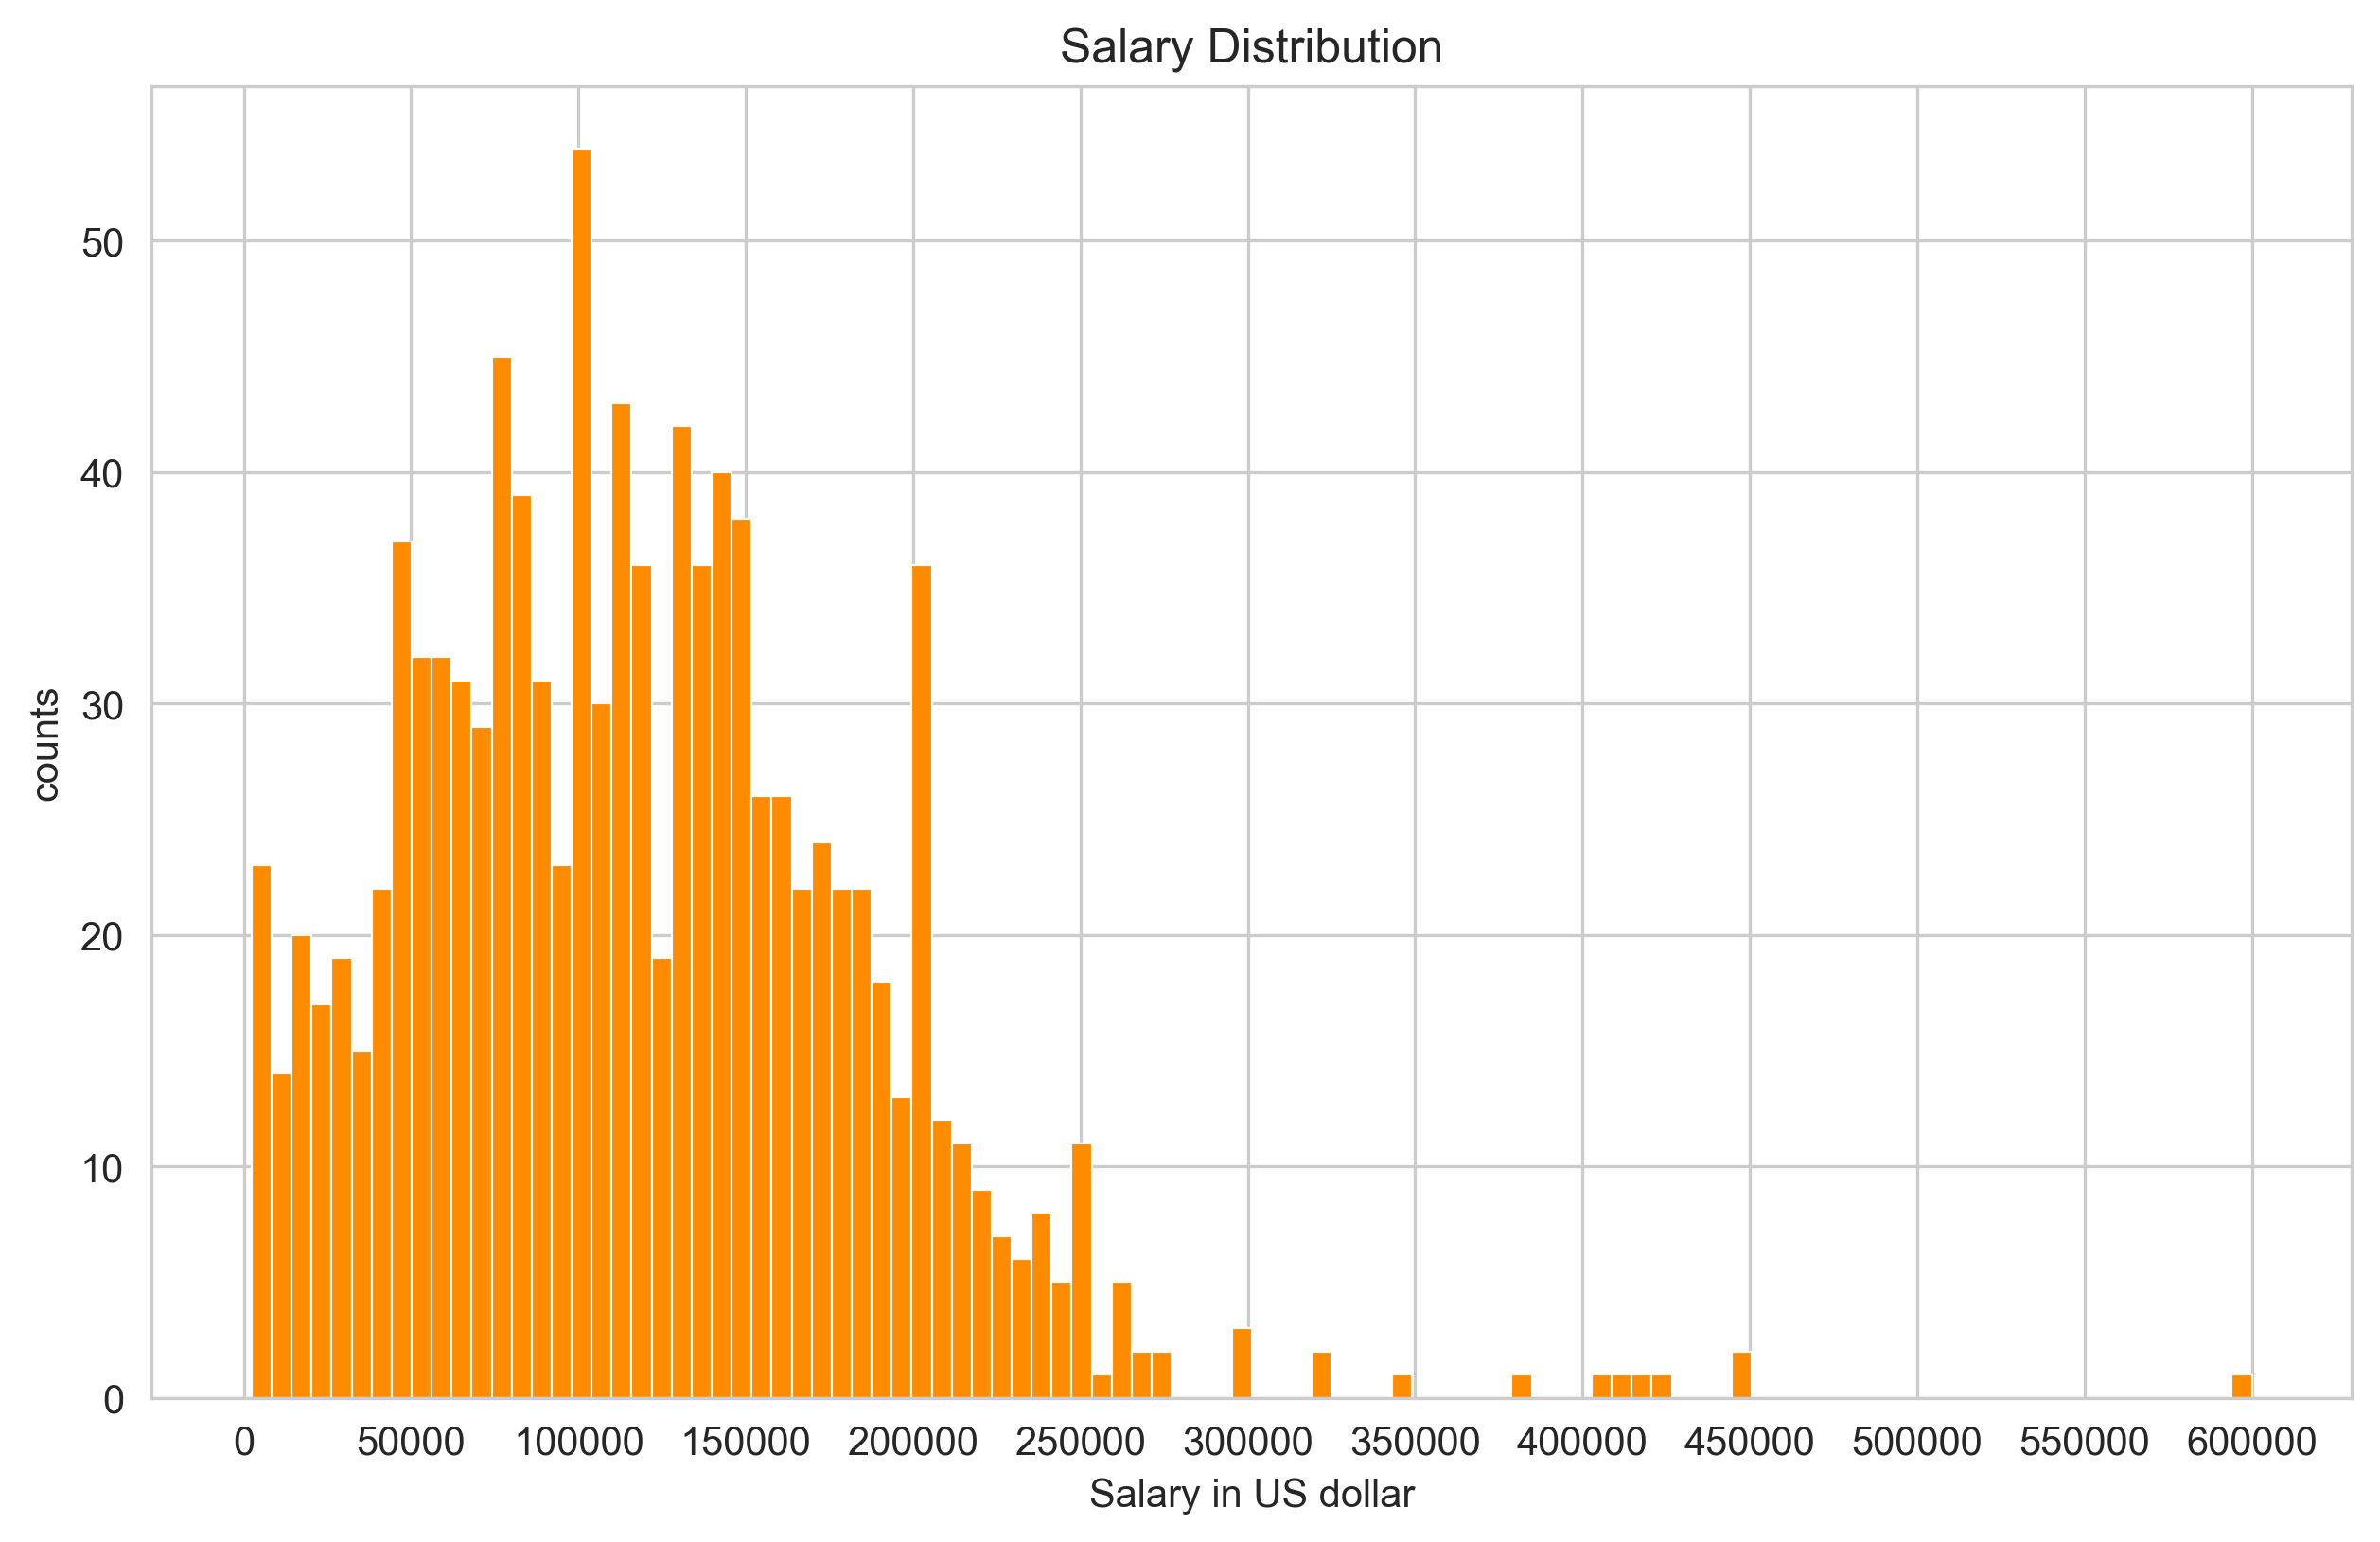

In [27]:
plt.figure(figsize=(10,6), dpi=300)
sns.set_style('whitegrid')
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
hist = sns.histplot(x=salaries_clean['salary_in_usd'], bins=100, color='darkorange', alpha=1.0);
hist.set(xlabel='Salary in US dollar', ylabel='counts', title='Salary Distribution', xticks=xticks);

> Observation: Salaries follow a right-skewed distribution, as we might expect. With more bins, the distribution is characterized by peaks around 100000 dollars and steep jumps. In the graph, the discontinuity above 285000 dollars highlights the gap or difference between top salaries and others.

In [28]:
# Display Entries with Top Salaries on the right hand side of the graph creating discontinuity
salaries_clean.query('salary_in_usd > 275000').sort_values(by='salary_in_usd', ascending=False)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1016,2021,EX,FT,Data Engineer,600000,US,100,US,L
832,2020,MI,FT,Research Scientist,450000,US,0,US,M
889,2021,MI,FT,Data Analyst,450000,US,100,US,L
1061,2021,MI,FT,Machine Learning Engineer,423000,US,50,US,L
987,2021,EX,CT,Data Scientist,416000,US,100,US,S
1064,2020,SE,FT,Data Scientist,412000,US,100,US,L
773,2022,SE,FT,Data Analytics Lead,405000,US,100,US,L
778,2022,SE,FT,Data Scientist,380000,US,100,US,L
112,2022,SE,FT,Data Architect,345600,US,0,US,M
1010,2020,EX,FT,Director of Data Science,325000,US,100,US,L


### What is th Distribution of Job Title 

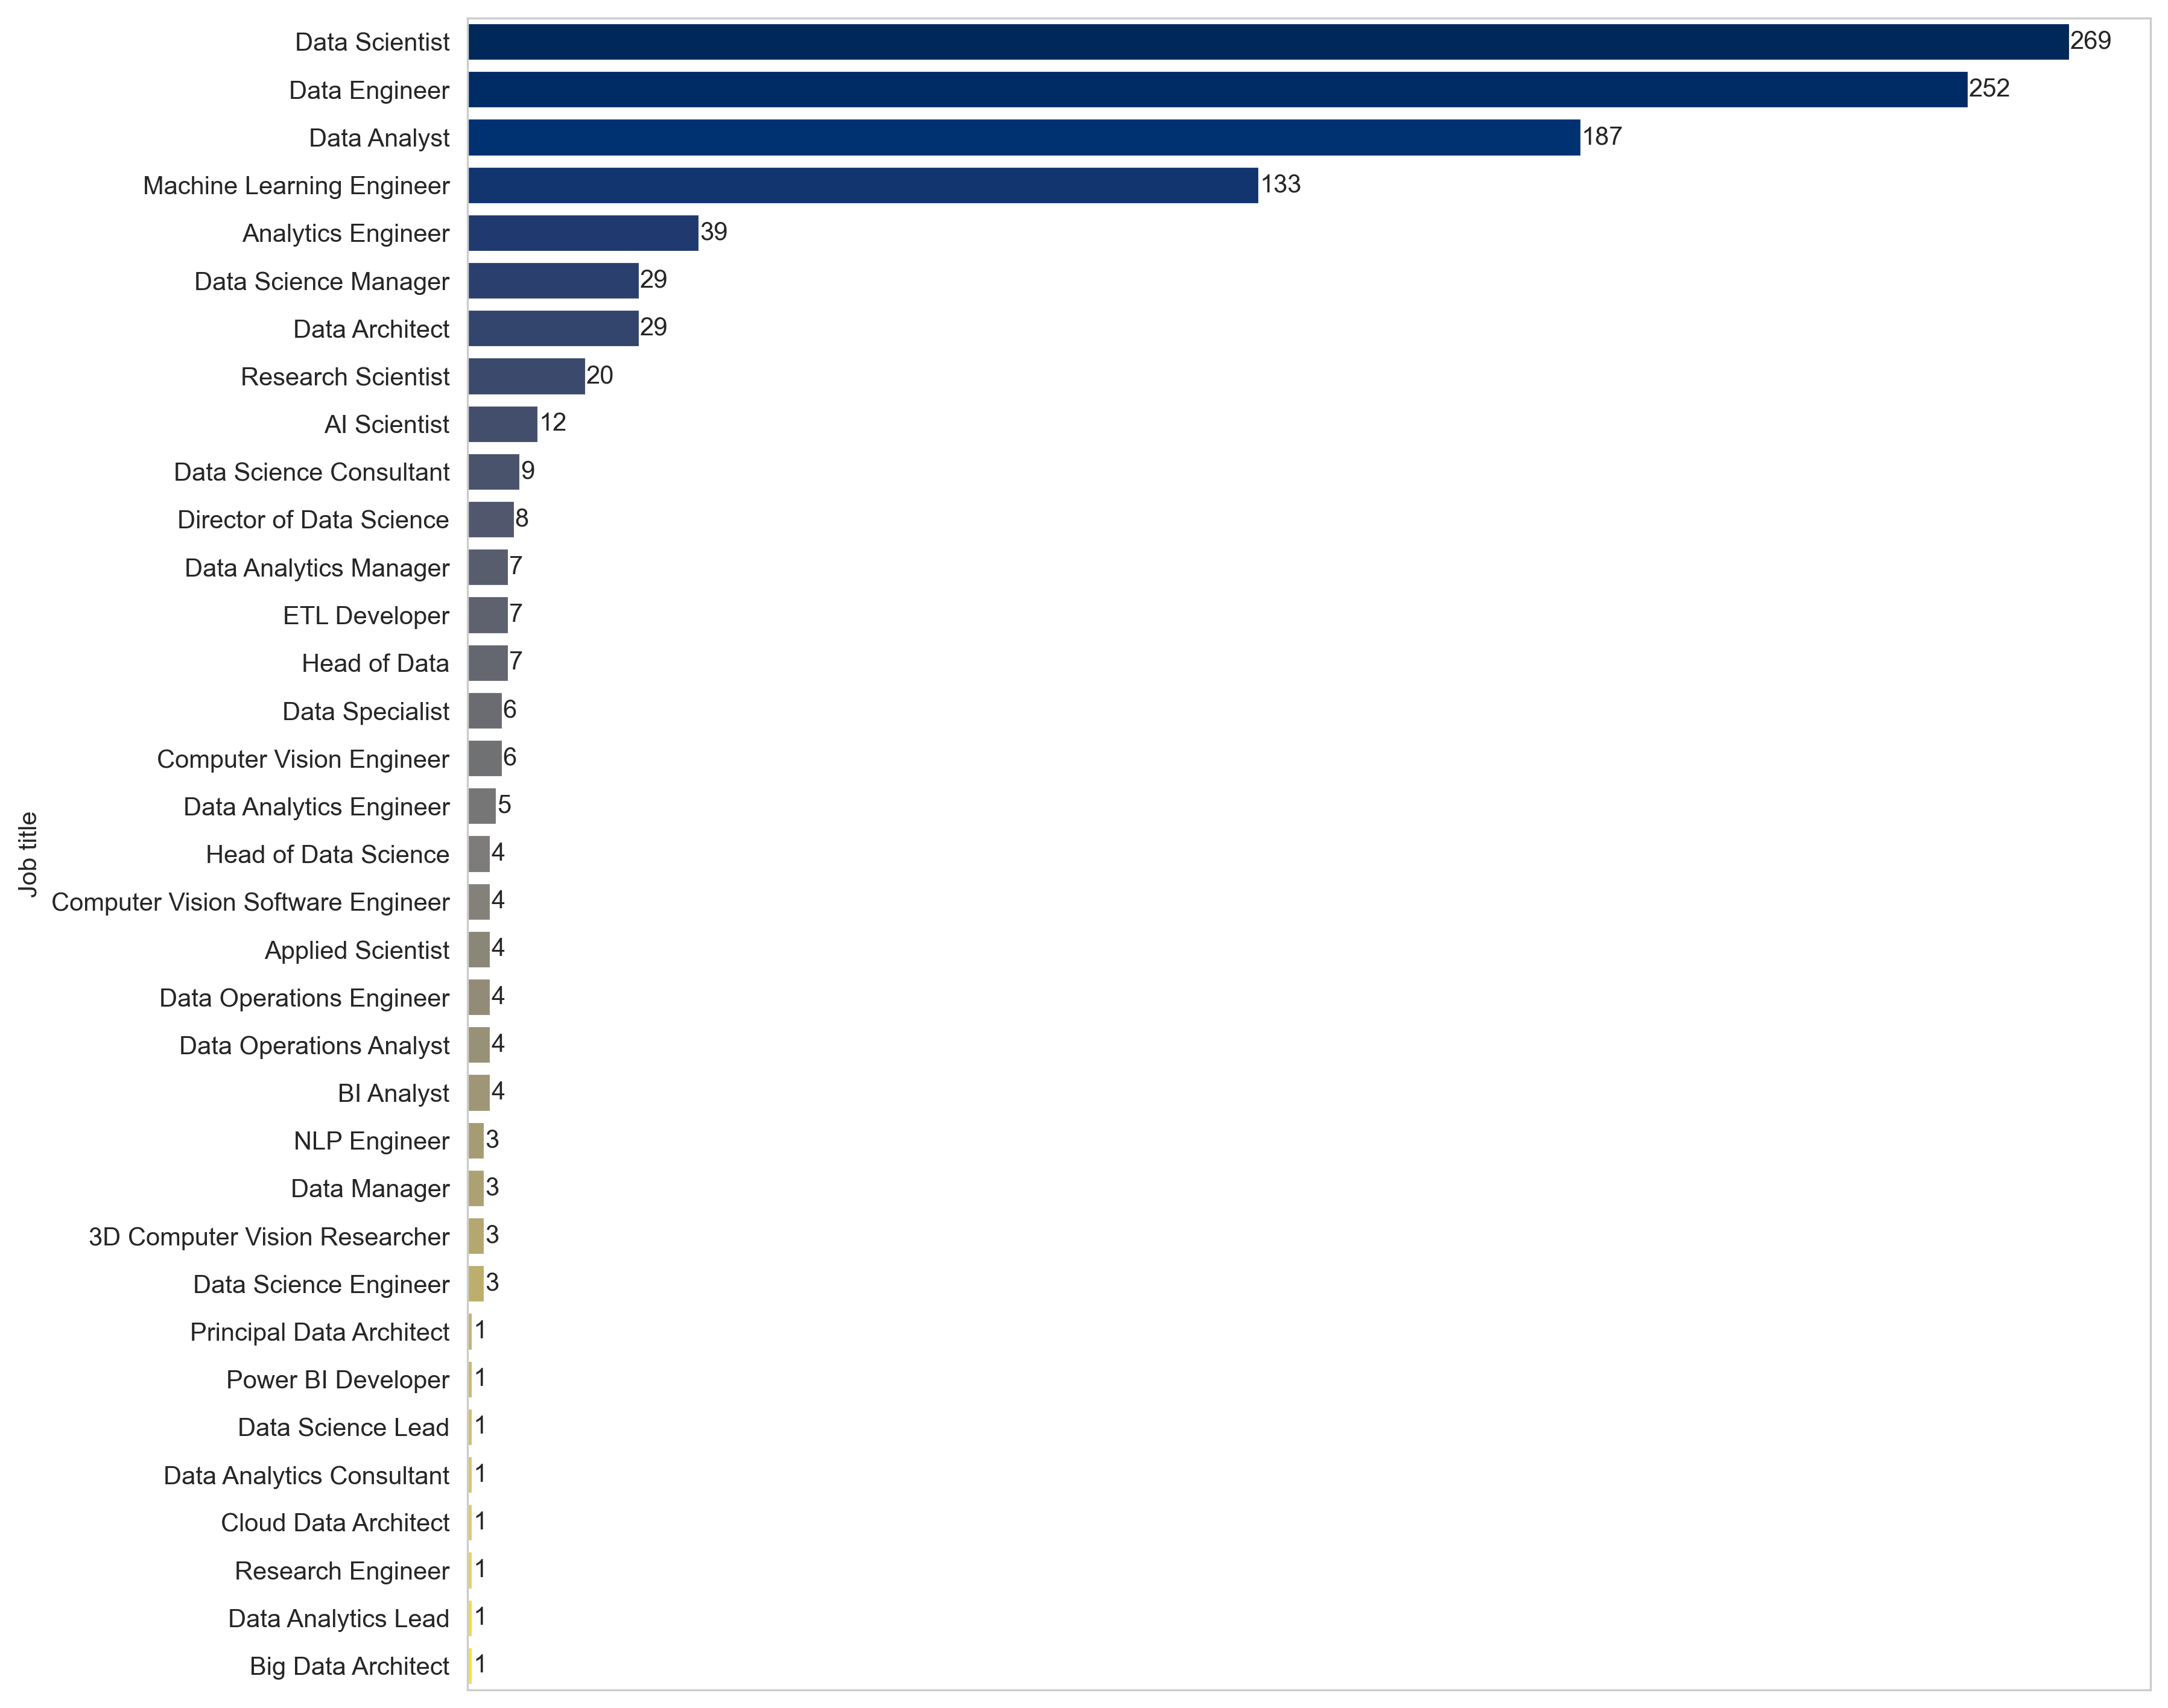

In [29]:
plt.figure(figsize=[12,12], dpi=300)
order = salaries_clean['job_title'].value_counts().index
job_ax = sns.countplot(palette='cividis', y=salaries_clean['job_title'], saturation=1, order=order)
job_ax.axes.get_xaxis().set_visible(False)
job_ax.bar_label(job_ax.containers[0])
plt.ylabel('Job title')
plt.show()

> Observation: The top five roles in descending order are:
   * Data Scientist - 269
   * Data Engineer - 252
   * Data Analyst - 187
   * Machine Learning Engineer - 133
   * Analytics Engineer - 39

### What is the Distribution of remote ratio?


 remote_ratio: The overall amount of work done remotely, possible values are as follows:
* 0: No remote work (less than 20%)
* 50: Partially remote
* 100: Fully remote (more than 80%)

<AxesSubplot: xlabel='remote_ratio', ylabel='count'>

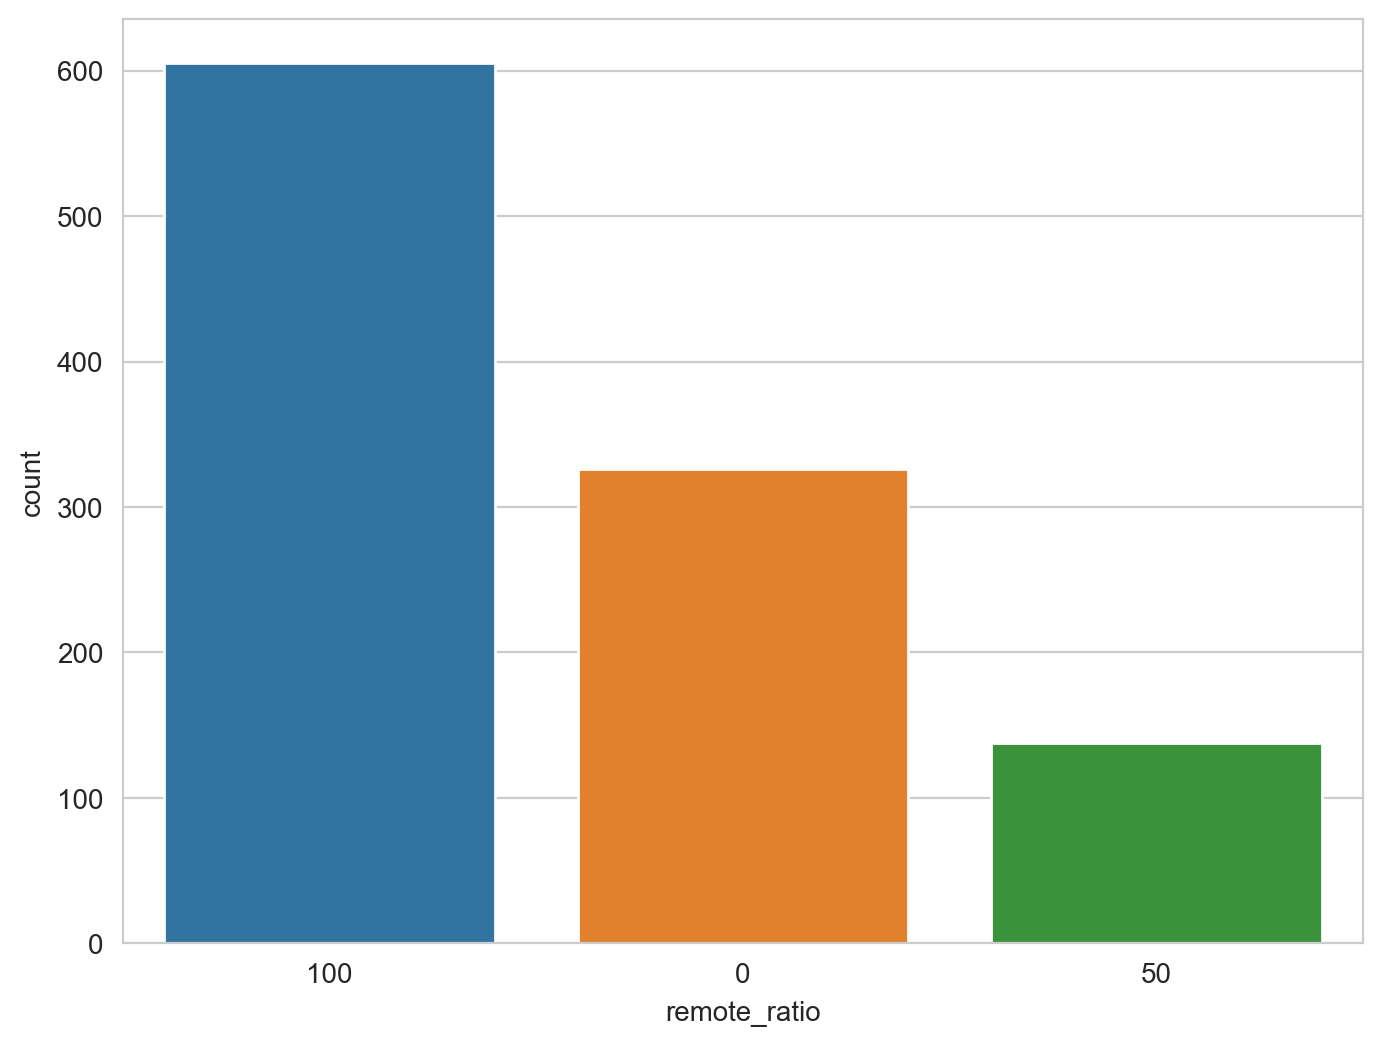

In [30]:
plt.figure(figsize=(8,6), dpi=200)
order = salaries_clean['remote_ratio'].value_counts().index
sns.countplot(x=salaries_clean['remote_ratio'], order=order)

> Observation: This Clearly shows most of the jobs are remote 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Right-skewed distribution is observed for the salary variable. There are more jobs with low wages than jobs with higher wages, so salaries tend to be concentrated at the low end of the graph. With more bins, the distribution consists of steep jumps and peaks around 100,000 dollars. On the graph, there is a discontinuity above 285000 dollars that highlights the gap or difference between the top salaries and those in the data science industry. Initially, we were concerned about discontinuous points on the graph, but after further investigation, we concluded that they were accurate.

## Based on the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was a usual distribution for all features under investigation. For data quality reasons, we changed the data type of some features and ensured only desired operations could be performed on the data. We changed experience level, company size and remote ratio to ordered-category variables and employment type to an unordered category variable.

# Bivariate Exploration

<AxesSubplot: xlabel='employment_type', ylabel='salary_in_usd'>

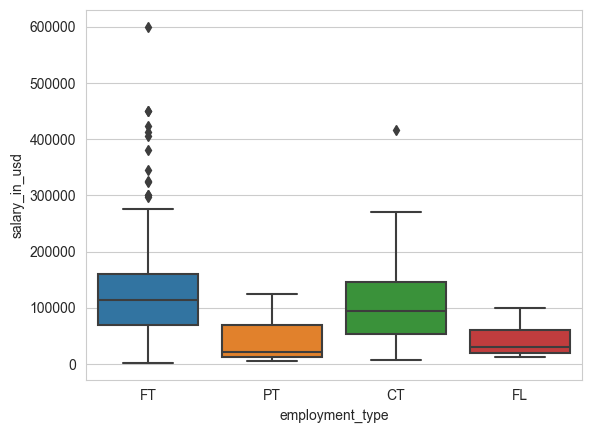

In [32]:
plt.set_yticks = [100000,200000,300000,400000]
sns.boxplot(data=salaries_clean, x='employment_type', y='salary_in_usd')